In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DGB-USD
Start: 2021-01-22 17:00:00+00:00, End: 2021-03-22 15:00:00+00:00
Training data: 1339 
Tsesting data: 1340 


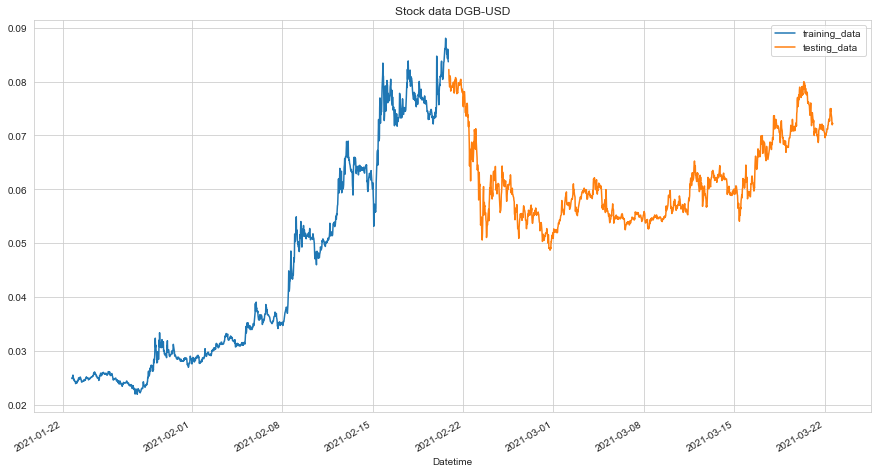

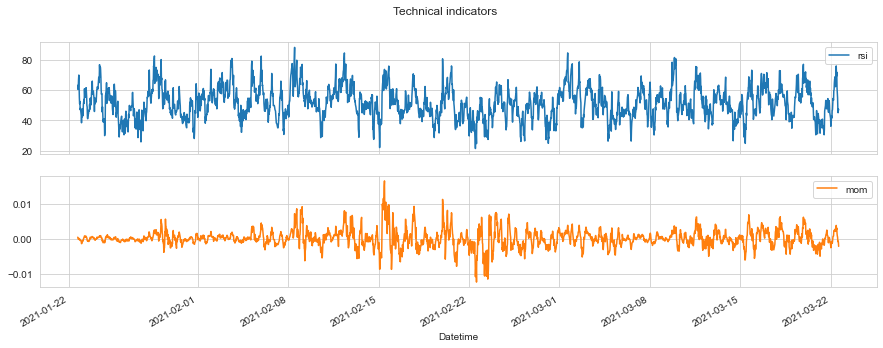

In [2]:
stock_name = 'dgb-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1619.31, duration: 0:00:00.266075
episode: 2/2000, episode end value: 1643.71, duration: 0:00:00.297053
episode: 3/2000, episode end value: 1628.38, duration: 0:00:00.287063
episode: 4/2000, episode end value: 1625.88, duration: 0:00:00.296082
episode: 5/2000, episode end value: 1619.77, duration: 0:00:00.279047
episode: 6/2000, episode end value: 1643.69, duration: 0:00:00.292065
episode: 7/2000, episode end value: 1626.60, duration: 0:00:00.269061
episode: 8/2000, episode end value: 1619.71, duration: 0:00:00.321072
episode: 9/2000, episode end value: 1614.48, duration: 0:00:00.307080
episode: 10/2000, episode end value: 1655.26, duration: 0:00:00.322072
episode: 11/2000, episode end value: 1622.98, duration: 0:00:00.305068
episode: 12/2000, episode end value: 1623.04, duration: 0:00:00.342095
episode: 13/2000, episode end value: 1611.36, duration: 0:00:00.324057
episode: 14/2000, episode end value: 1636.39, duration: 0:00:00.357078
episode: 15/200

episode: 117/2000, episode end value: 1608.41, duration: 0:00:00.287062
episode: 118/2000, episode end value: 1616.44, duration: 0:00:00.288065
episode: 119/2000, episode end value: 1625.93, duration: 0:00:00.330078
episode: 120/2000, episode end value: 1612.71, duration: 0:00:00.316066
episode: 121/2000, episode end value: 1607.90, duration: 0:00:00.324075
episode: 122/2000, episode end value: 1610.51, duration: 0:00:00.306067
episode: 123/2000, episode end value: 1631.06, duration: 0:00:00.317072
episode: 124/2000, episode end value: 1620.39, duration: 0:00:00.350093
episode: 125/2000, episode end value: 1609.29, duration: 0:00:00.340185
episode: 126/2000, episode end value: 1600.88, duration: 0:00:00.293062
episode: 127/2000, episode end value: 1603.05, duration: 0:00:00.297064
episode: 128/2000, episode end value: 1616.44, duration: 0:00:00.286062
episode: 129/2000, episode end value: 1619.77, duration: 0:00:00.305073
episode: 130/2000, episode end value: 1606.16, duration: 0:00:00

episode: 231/2000, episode end value: 1624.89, duration: 0:00:00.251055
episode: 232/2000, episode end value: 1632.24, duration: 0:00:00.256057
episode: 233/2000, episode end value: 1639.29, duration: 0:00:00.256056
episode: 234/2000, episode end value: 1624.53, duration: 0:00:00.227052
episode: 235/2000, episode end value: 1627.76, duration: 0:00:00.276062
episode: 236/2000, episode end value: 1621.95, duration: 0:00:00.250057
episode: 237/2000, episode end value: 1612.83, duration: 0:00:00.257058
episode: 238/2000, episode end value: 1659.31, duration: 0:00:00.260059
episode: 239/2000, episode end value: 1608.57, duration: 0:00:00.252059
episode: 240/2000, episode end value: 1625.27, duration: 0:00:00.279061
episode: 241/2000, episode end value: 1656.64, duration: 0:00:00.237059
episode: 242/2000, episode end value: 1625.97, duration: 0:00:00.224043
episode: 243/2000, episode end value: 1678.46, duration: 0:00:00.232052
episode: 244/2000, episode end value: 1657.00, duration: 0:00:00

episode: 345/2000, episode end value: 1646.66, duration: 0:00:00.270062
episode: 346/2000, episode end value: 1654.08, duration: 0:00:00.253056
episode: 347/2000, episode end value: 1642.47, duration: 0:00:00.297071
episode: 348/2000, episode end value: 1661.71, duration: 0:00:00.271056
episode: 349/2000, episode end value: 1655.11, duration: 0:00:00.276066
episode: 350/2000, episode end value: 1642.60, duration: 0:00:00.301068
episode: 351/2000, episode end value: 1665.31, duration: 0:00:00.310071
episode: 352/2000, episode end value: 1645.42, duration: 0:00:00.276059
episode: 353/2000, episode end value: 1668.70, duration: 0:00:00.294068
episode: 354/2000, episode end value: 1636.58, duration: 0:00:00.260053
episode: 355/2000, episode end value: 1656.89, duration: 0:00:00.288640
episode: 356/2000, episode end value: 1653.55, duration: 0:00:00.256993
episode: 357/2000, episode end value: 1648.60, duration: 0:00:00.270130
episode: 358/2000, episode end value: 1634.34, duration: 0:00:00

episode: 459/2000, episode end value: 1639.82, duration: 0:00:00.328252
episode: 460/2000, episode end value: 1739.13, duration: 0:00:00.294106
episode: 461/2000, episode end value: 1719.56, duration: 0:00:00.292062
episode: 462/2000, episode end value: 1640.16, duration: 0:00:00.278064
episode: 463/2000, episode end value: 1643.91, duration: 0:00:00.276065
episode: 464/2000, episode end value: 1657.71, duration: 0:00:00.271062
episode: 465/2000, episode end value: 1658.52, duration: 0:00:00.317078
episode: 466/2000, episode end value: 1666.55, duration: 0:00:00.311072
episode: 467/2000, episode end value: 1706.76, duration: 0:00:00.343079
episode: 468/2000, episode end value: 1737.13, duration: 0:00:00.328073
episode: 469/2000, episode end value: 1678.00, duration: 0:00:00.306070
episode: 470/2000, episode end value: 1665.33, duration: 0:00:00.299065
episode: 471/2000, episode end value: 1669.14, duration: 0:00:00.287066
episode: 472/2000, episode end value: 1667.21, duration: 0:00:00

episode: 573/2000, episode end value: 1647.35, duration: 0:00:00.301069
episode: 574/2000, episode end value: 1667.22, duration: 0:00:00.292062
episode: 575/2000, episode end value: 1639.21, duration: 0:00:00.325080
episode: 576/2000, episode end value: 1645.43, duration: 0:00:00.352103
episode: 577/2000, episode end value: 1743.43, duration: 0:00:00.336079
episode: 578/2000, episode end value: 1693.91, duration: 0:00:00.318070
episode: 579/2000, episode end value: 1647.43, duration: 0:00:00.297070
episode: 580/2000, episode end value: 1672.38, duration: 0:00:00.292063
episode: 581/2000, episode end value: 1651.75, duration: 0:00:00.291064
episode: 582/2000, episode end value: 1698.11, duration: 0:00:00.305073
episode: 583/2000, episode end value: 1641.15, duration: 0:00:00.275064
episode: 584/2000, episode end value: 1670.54, duration: 0:00:00.351079
episode: 585/2000, episode end value: 1631.39, duration: 0:00:00.353080
episode: 586/2000, episode end value: 1668.47, duration: 0:00:00

episode: 687/2000, episode end value: 1654.98, duration: 0:00:00.312071
episode: 688/2000, episode end value: 1670.64, duration: 0:00:00.298068
episode: 689/2000, episode end value: 1635.35, duration: 0:00:00.304074
episode: 690/2000, episode end value: 1660.79, duration: 0:00:00.290067
episode: 691/2000, episode end value: 1662.07, duration: 0:00:00.284062
episode: 692/2000, episode end value: 1758.35, duration: 0:00:00.311070
episode: 693/2000, episode end value: 1659.20, duration: 0:00:00.282063
episode: 694/2000, episode end value: 1681.12, duration: 0:00:00.289069
episode: 695/2000, episode end value: 1684.46, duration: 0:00:00.286067
episode: 696/2000, episode end value: 1658.51, duration: 0:00:00.286063
episode: 697/2000, episode end value: 1684.06, duration: 0:00:00.296064
episode: 698/2000, episode end value: 1671.53, duration: 0:00:00.316072
episode: 699/2000, episode end value: 1647.68, duration: 0:00:00.311069
episode: 700/2000, episode end value: 1652.82, duration: 0:00:00

episode: 801/2000, episode end value: 1685.97, duration: 0:00:00.269061
episode: 802/2000, episode end value: 1660.65, duration: 0:00:00.309074
episode: 803/2000, episode end value: 1646.05, duration: 0:00:00.304068
episode: 804/2000, episode end value: 1640.37, duration: 0:00:00.293062
episode: 805/2000, episode end value: 1647.09, duration: 0:00:00.315077
episode: 806/2000, episode end value: 1657.41, duration: 0:00:00.290068
episode: 807/2000, episode end value: 1630.07, duration: 0:00:00.323070
episode: 808/2000, episode end value: 1660.28, duration: 0:00:00.294069
episode: 809/2000, episode end value: 1675.81, duration: 0:00:00.314073
episode: 810/2000, episode end value: 1627.69, duration: 0:00:00.279060
episode: 811/2000, episode end value: 1652.85, duration: 0:00:00.302067
episode: 812/2000, episode end value: 1679.01, duration: 0:00:00.320075
episode: 813/2000, episode end value: 1639.05, duration: 0:00:00.299061
episode: 814/2000, episode end value: 1673.41, duration: 0:00:00

episode: 915/2000, episode end value: 1676.94, duration: 0:00:00.333739
episode: 916/2000, episode end value: 1638.87, duration: 0:00:00.309068
episode: 917/2000, episode end value: 1666.38, duration: 0:00:00.295063
episode: 918/2000, episode end value: 1653.02, duration: 0:00:00.311072
episode: 919/2000, episode end value: 1653.19, duration: 0:00:00.299068
episode: 920/2000, episode end value: 1644.79, duration: 0:00:00.303066
episode: 921/2000, episode end value: 1652.49, duration: 0:00:00.356082
episode: 922/2000, episode end value: 1650.82, duration: 0:00:00.298068
episode: 923/2000, episode end value: 1652.64, duration: 0:00:00.299066
episode: 924/2000, episode end value: 1659.79, duration: 0:00:00.311067
episode: 925/2000, episode end value: 1750.84, duration: 0:00:00.292064
episode: 926/2000, episode end value: 1654.97, duration: 0:00:00.333074
episode: 927/2000, episode end value: 1651.33, duration: 0:00:00.369085
episode: 928/2000, episode end value: 1670.29, duration: 0:00:00

episode: 1029/2000, episode end value: 1627.87, duration: 0:00:00.288063
episode: 1030/2000, episode end value: 1658.13, duration: 0:00:00.286062
episode: 1031/2000, episode end value: 1651.41, duration: 0:00:00.274061
episode: 1032/2000, episode end value: 1735.89, duration: 0:00:00.282063
episode: 1033/2000, episode end value: 1652.09, duration: 0:00:00.302072
episode: 1034/2000, episode end value: 1650.39, duration: 0:00:00.304063
episode: 1035/2000, episode end value: 1684.77, duration: 0:00:00.314072
episode: 1036/2000, episode end value: 1684.46, duration: 0:00:00.317072
episode: 1037/2000, episode end value: 1620.35, duration: 0:00:00.319069
episode: 1038/2000, episode end value: 1641.92, duration: 0:00:00.289069
episode: 1039/2000, episode end value: 1637.79, duration: 0:00:00.320072
episode: 1040/2000, episode end value: 1677.13, duration: 0:00:00.308068
episode: 1041/2000, episode end value: 1649.88, duration: 0:00:00.303071
episode: 1042/2000, episode end value: 1673.06, dur

episode: 1142/2000, episode end value: 1648.47, duration: 0:00:00.311070
episode: 1143/2000, episode end value: 1657.55, duration: 0:00:00.343081
episode: 1144/2000, episode end value: 1667.76, duration: 0:00:00.312061
episode: 1145/2000, episode end value: 1663.64, duration: 0:00:00.300069
episode: 1146/2000, episode end value: 1653.84, duration: 0:00:00.295064
episode: 1147/2000, episode end value: 1674.11, duration: 0:00:00.281064
episode: 1148/2000, episode end value: 1723.96, duration: 0:00:00.300068
episode: 1149/2000, episode end value: 1652.71, duration: 0:00:00.283068
episode: 1150/2000, episode end value: 1671.17, duration: 0:00:00.310067
episode: 1151/2000, episode end value: 1631.82, duration: 0:00:00.323075
episode: 1152/2000, episode end value: 1618.41, duration: 0:00:00.319071
episode: 1153/2000, episode end value: 1705.61, duration: 0:00:00.385085
episode: 1154/2000, episode end value: 1647.83, duration: 0:00:00.294065
episode: 1155/2000, episode end value: 1637.63, dur

episode: 1255/2000, episode end value: 1725.49, duration: 0:00:00.380084
episode: 1256/2000, episode end value: 1654.16, duration: 0:00:00.376084
episode: 1257/2000, episode end value: 1666.39, duration: 0:00:00.365079
episode: 1258/2000, episode end value: 1649.43, duration: 0:00:00.342626
episode: 1259/2000, episode end value: 1648.37, duration: 0:00:00.418327
episode: 1260/2000, episode end value: 1649.73, duration: 0:00:00.455860
episode: 1261/2000, episode end value: 1633.02, duration: 0:00:00.428092
episode: 1262/2000, episode end value: 1650.20, duration: 0:00:00.388087
episode: 1263/2000, episode end value: 1665.50, duration: 0:00:00.393443
episode: 1264/2000, episode end value: 1690.08, duration: 0:00:00.420279
episode: 1265/2000, episode end value: 1665.76, duration: 0:00:00.374085
episode: 1266/2000, episode end value: 1685.55, duration: 0:00:00.379087
episode: 1267/2000, episode end value: 1647.74, duration: 0:00:00.404084
episode: 1268/2000, episode end value: 1634.72, dur

episode: 1368/2000, episode end value: 1671.50, duration: 0:00:00.392085
episode: 1369/2000, episode end value: 1664.95, duration: 0:00:00.381090
episode: 1370/2000, episode end value: 1653.72, duration: 0:00:00.432101
episode: 1371/2000, episode end value: 1668.75, duration: 0:00:00.364084
episode: 1372/2000, episode end value: 1659.51, duration: 0:00:00.346075
episode: 1373/2000, episode end value: 1656.79, duration: 0:00:00.373084
episode: 1374/2000, episode end value: 1655.64, duration: 0:00:00.296065
episode: 1375/2000, episode end value: 1718.17, duration: 0:00:00.308069
episode: 1376/2000, episode end value: 1648.88, duration: 0:00:00.338077
episode: 1377/2000, episode end value: 1666.34, duration: 0:00:00.306064
episode: 1378/2000, episode end value: 1691.00, duration: 0:00:00.358083
episode: 1379/2000, episode end value: 1639.75, duration: 0:00:00.296071
episode: 1380/2000, episode end value: 1674.21, duration: 0:00:00.317069
episode: 1381/2000, episode end value: 1658.39, dur

episode: 1481/2000, episode end value: 1650.22, duration: 0:00:00.387089
episode: 1482/2000, episode end value: 1704.02, duration: 0:00:00.333075
episode: 1483/2000, episode end value: 1656.91, duration: 0:00:00.303067
episode: 1484/2000, episode end value: 1627.17, duration: 0:00:00.327074
episode: 1485/2000, episode end value: 1641.87, duration: 0:00:00.376087
episode: 1486/2000, episode end value: 1674.45, duration: 0:00:00.316066
episode: 1487/2000, episode end value: 1644.93, duration: 0:00:00.410095
episode: 1488/2000, episode end value: 1672.38, duration: 0:00:00.341074
episode: 1489/2000, episode end value: 1624.89, duration: 0:00:00.340078
episode: 1490/2000, episode end value: 1672.83, duration: 0:00:00.400095
episode: 1491/2000, episode end value: 1660.57, duration: 0:00:00.376083
episode: 1492/2000, episode end value: 1741.82, duration: 0:00:00.331075
episode: 1493/2000, episode end value: 1668.59, duration: 0:00:00.366079
episode: 1494/2000, episode end value: 1674.77, dur

episode: 1594/2000, episode end value: 1652.86, duration: 0:00:00.322454
episode: 1595/2000, episode end value: 1655.69, duration: 0:00:00.325202
episode: 1596/2000, episode end value: 1652.22, duration: 0:00:00.288020
episode: 1597/2000, episode end value: 1731.56, duration: 0:00:00.284143
episode: 1598/2000, episode end value: 1779.49, duration: 0:00:00.311756
episode: 1599/2000, episode end value: 1658.21, duration: 0:00:00.313070
episode: 1600/2000, episode end value: 1662.86, duration: 0:00:00.298071
episode: 1601/2000, episode end value: 1664.12, duration: 0:00:00.336069
episode: 1602/2000, episode end value: 1647.09, duration: 0:00:00.346084
episode: 1603/2000, episode end value: 1654.35, duration: 0:00:00.321073
episode: 1604/2000, episode end value: 1673.68, duration: 0:00:00.322068
episode: 1605/2000, episode end value: 1644.53, duration: 0:00:00.303066
episode: 1606/2000, episode end value: 1666.94, duration: 0:00:00.305066
episode: 1607/2000, episode end value: 1644.68, dur

episode: 1707/2000, episode end value: 1655.46, duration: 0:00:00.333075
episode: 1708/2000, episode end value: 1667.18, duration: 0:00:00.299065
episode: 1709/2000, episode end value: 1763.08, duration: 0:00:00.294065
episode: 1710/2000, episode end value: 1644.04, duration: 0:00:00.447103
episode: 1711/2000, episode end value: 1662.30, duration: 0:00:00.322073
episode: 1712/2000, episode end value: 1647.82, duration: 0:00:00.344075
episode: 1713/2000, episode end value: 1650.90, duration: 0:00:00.305069
episode: 1714/2000, episode end value: 1658.12, duration: 0:00:00.352080
episode: 1715/2000, episode end value: 1696.43, duration: 0:00:00.336074
episode: 1716/2000, episode end value: 1657.46, duration: 0:00:00.353083
episode: 1717/2000, episode end value: 1730.23, duration: 0:00:00.340081
episode: 1718/2000, episode end value: 1651.10, duration: 0:00:00.309062
episode: 1719/2000, episode end value: 1631.83, duration: 0:00:00.345081
episode: 1720/2000, episode end value: 1650.93, dur

episode: 1820/2000, episode end value: 1731.70, duration: 0:00:00.278067
episode: 1821/2000, episode end value: 1674.46, duration: 0:00:00.290063
episode: 1822/2000, episode end value: 1655.31, duration: 0:00:00.261063
episode: 1823/2000, episode end value: 1640.77, duration: 0:00:00.281058
episode: 1824/2000, episode end value: 1733.37, duration: 0:00:00.300070
episode: 1825/2000, episode end value: 1665.94, duration: 0:00:00.282064
episode: 1826/2000, episode end value: 1658.98, duration: 0:00:00.266059
episode: 1827/2000, episode end value: 1661.15, duration: 0:00:00.275065
episode: 1828/2000, episode end value: 1647.97, duration: 0:00:00.266062
episode: 1829/2000, episode end value: 1719.16, duration: 0:00:00.281065
episode: 1830/2000, episode end value: 1648.42, duration: 0:00:00.277060
episode: 1831/2000, episode end value: 1680.59, duration: 0:00:00.278064
episode: 1832/2000, episode end value: 1693.05, duration: 0:00:00.273064
episode: 1833/2000, episode end value: 1645.48, dur

episode: 1933/2000, episode end value: 1660.73, duration: 0:00:00.331070
episode: 1934/2000, episode end value: 1725.05, duration: 0:00:00.277063
episode: 1935/2000, episode end value: 1659.22, duration: 0:00:00.266060
episode: 1936/2000, episode end value: 1716.97, duration: 0:00:00.266060
episode: 1937/2000, episode end value: 1680.13, duration: 0:00:00.246053
episode: 1938/2000, episode end value: 1638.54, duration: 0:00:00.240051
episode: 1939/2000, episode end value: 1661.23, duration: 0:00:00.242054
episode: 1940/2000, episode end value: 1657.35, duration: 0:00:00.249059
episode: 1941/2000, episode end value: 1662.95, duration: 0:00:00.246053
episode: 1942/2000, episode end value: 1639.20, duration: 0:00:00.241056
episode: 1943/2000, episode end value: 1646.06, duration: 0:00:00.240053
episode: 1944/2000, episode end value: 1669.20, duration: 0:00:00.246050
episode: 1945/2000, episode end value: 1645.42, duration: 0:00:00.261061
episode: 1946/2000, episode end value: 1654.45, dur

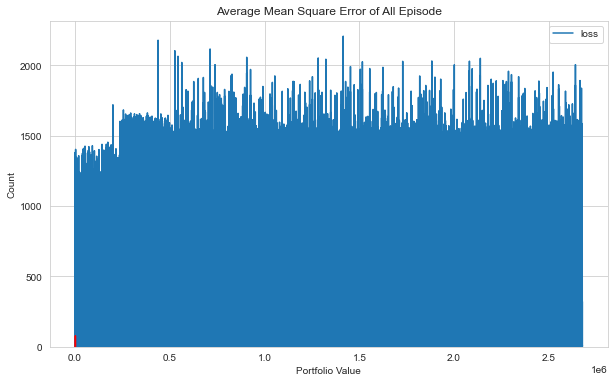

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

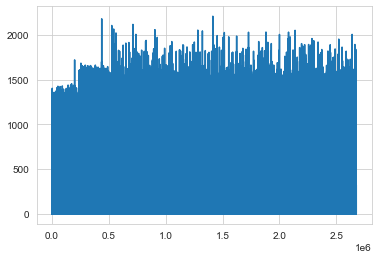

In [5]:
plt.plot(agent.model.losses)

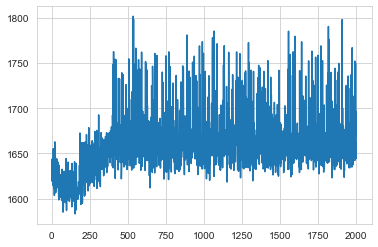

In [6]:
plt.plot(portfolio_value)

episode end value: 1083.01, duration: 0:00:00.100022
Sell: 0 times, Buy: 2 times


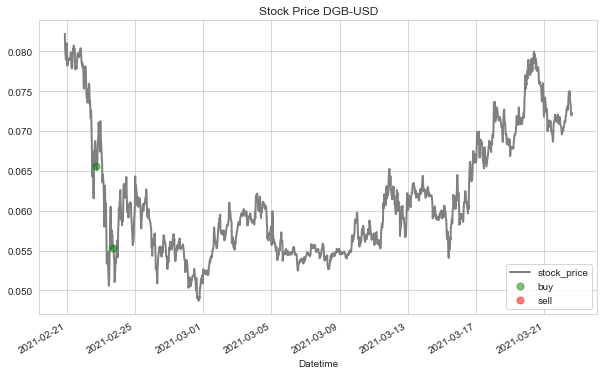

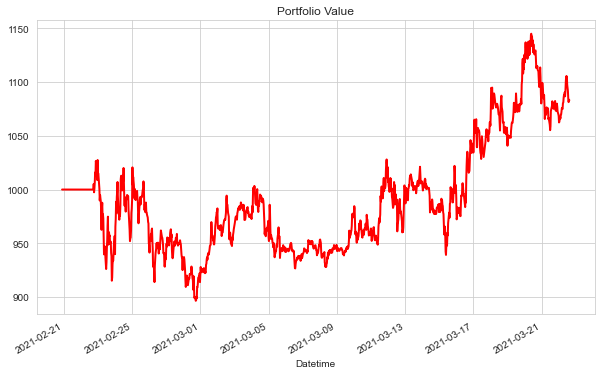

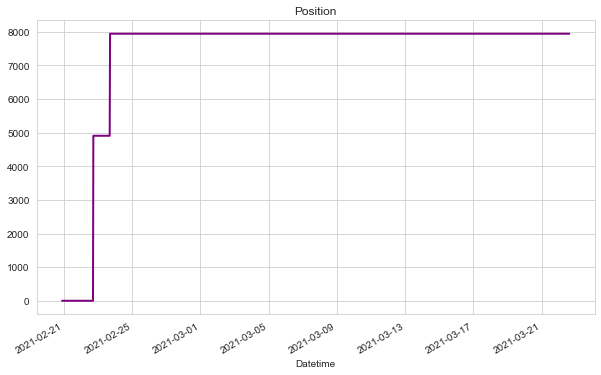

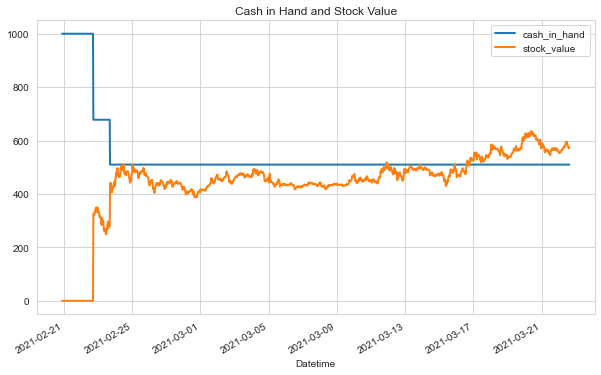

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DGB-USD
Start: 2021-02-20 21:30:00+00:00  End: 2021-03-22 15:00:00+00:00
Compound Annual Growth Rate: 1.51 %
Volatility: 0.0983
shape ratio: 0.0418
Maximun drawdown: -12.74 %
Calmar ratio: 0.1186
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.42 %
Volatility (benchmark): 0.2309
shape ratio: -0.1525
Maximun drawdown: -39.90 %
Calmar ratio (benchmark): -0.0607


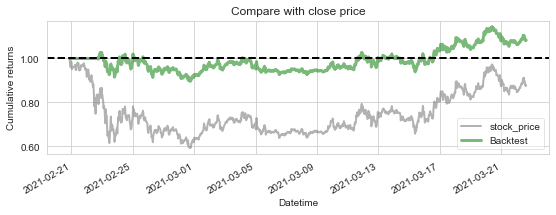

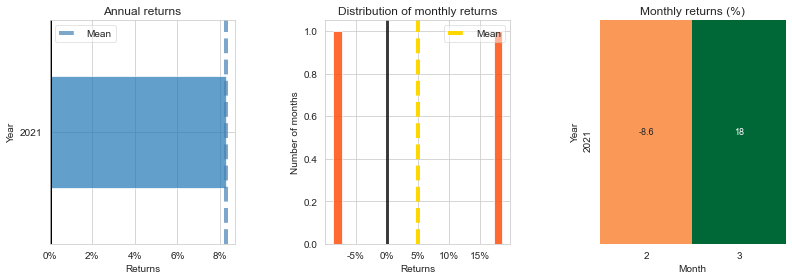

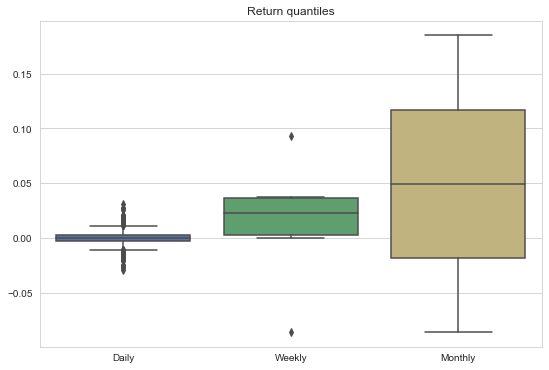

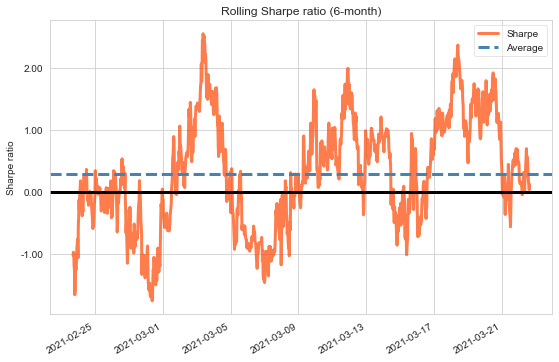

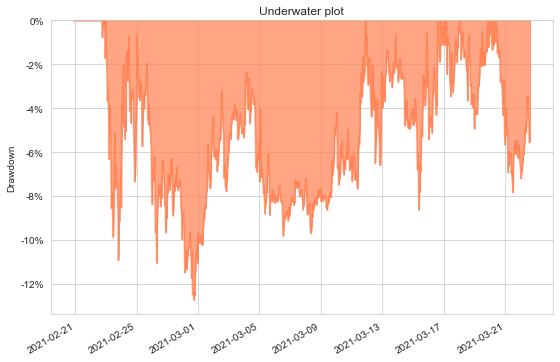

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')